$\LaTeX$ macros
$\newcommand{\pba}{{p^b_a}}$
$\newcommand{\de}{{\dot{e}}}$
$\newcommand{\dde}{{\ddot{e}}}$
$\newcommand{\pbd}{{p^b_d}}$
 $\newcommand{\dpba}{{\dot{p}^b_a}}$
 $\newcommand{\ddpba}{{\ddot{p}^b_a}}$
 $\newcommand{\dpbd}{{\dot{p}^b_d}}$
 $\newcommand{\ddpbd}{{\ddot{p}^b_d}}$
 $\newcommand{\pag}{{p^a_g}}$
 $\newcommand{\pav}{{p^a_v}}$
 $\newcommand{\dpag}{{\dot{p}^a_g}}$
 $\newcommand{\pai}{{p^a_i}}$
 $\newcommand{\dpai}{{\dot{p}^a_i}}$
 $\newcommand{\pbg}{{p^b_g}}$
 $\newcommand{\dpbg}{{\dot{p}^b_g}}$
 $\newcommand{\ddpbg}{{\ddot{p}^b_g}}$
 $\newcommand{\pbi}{{p^b_i}}$
 $\newcommand{\dpbi}{{\dot{p}^b_i}}$
 $\newcommand{\ddpbi}{{\ddot{p}^b_i}}$
 $\newcommand{\Rba}{{R^b_a}}$
 $\newcommand{\dRba}{{\dot{R}{}^b_a}}$
 $\newcommand{\ddRba}{{\ddot{R}{}^b_a}}$
 $\newcommand{\Rab}{{R^a_b}}$
 $\newcommand{\omaa}{{\omega^a_a}}$
 $\newcommand{\domaa}{{\dot{\omega}{}^a_a}}$
 $\newcommand{\Somaa}{{S\left(\omega^a_a\right)}}$
 $\newcommand{\dSomaa}{{S\left(\dot{\omega}{}^a_a\right)}}$
 $\newcommand{\Spag}{{S\left(p^a_g\right)}}$
 $\newcommand{\Spai}{{S\left(p^a_i\right)}}$
 $\newcommand{\nuaa}{{\nu^a_a}}$
 $\newcommand{\dnuaa}{{\dot{\nu}{}^a_a}}$
 $\newcommand{\Fb}{{F^b}}$
 $\newcommand{\Fa}{{F^a}}$
 $\newcommand{\Fg}{{F_g}}$
 $\newcommand{\Fv}{{F_v}}$
 $\newcommand{\Ng}{{N_g}}$
 $\newcommand{\Nv}{{N_v}}$
 $\newcommand{\Fe}{{F^{ext}}}$
 $\newcommand{\Na}{{N^a}}$
 $\newcommand{\iM}{{M^{-1}}}$
 $\newcommand{\BM}{\left[\begin{matrix}}$
 $\newcommand{\EBM}{\end{matrix}\right]}$
 $\newcommand{\gamaa}{{\gamma^a_a}}$
 $\newcommand{\dgamaa}{{\dot{\gamma}{}^a_a}}$
 $\newcommand{\vx}{\vec{x}}$
 $\newcommand{\vt}{\vec{\tau}}$
 $\newcommand{\vn}{\vec{\nu}}$
 $\newcommand{\T}{^\top}$
 $\newcommand{\o}[1]{{\overline{#1}}}$
 $\newcommand{\d}[2]{{\frac{\partial #1}{\partial #2}}}$

# Steady-state flight

- steady wings-level flight
- steady turning flight (yaw)
- steady pull-up/push-over (pitch)
- steady roll
- hovering

## Linear approximation

$$
\frac{dx}{dt}=f(x,u) \rightarrow \dot{x}=ax'+bu'
$$

### Taylor series approximation

$$
f(x,u) \simeq f(\o{x},\o{u}) + \left.\d{f}{x}\right|_{\o{x},\o{u}} \left(x-\o{x}\right) + \left.\d{f}{u}\right|_{\o{x},\o{u}} \left(u-\o{u}\right) + h.\!o.\!t.
$$
Deviation variables:
$$
\begin{align}
\left(x-\o{x}\right) &= x' \\
\left(u-\o{u}\right) &= u' \\
\end{align}
$$

## Example

$$
\dot{x} = \sin(x) + u
$$
Steady state for $\o{x}=\frac{\pi}{3}$:
$$
\sin(\o{x})+u = 0 \rightarrow \o{u}=-\frac{\sqrt{3}}{2}
$$


In [1]:
from sympy import *
from sympy.plotting import plot
from sympy.matrices import matrix_multiply_elementwise as mme
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import functools

def log_results(func):
    @functools.wraps(func)
    def w_dec(*args, **kwargs):
        res = func(*args, **kwargs)
        t_old = -1 if len(w_dec.t) == 0 else w_dec.t[-1]
        t_new = args[0]
        if t_new > t_old:
            w_dec.log.append(res)
            w_dec.t.append(args[0])
        else:
            f = filter(lambda x: x >= t_new, w_dec.t)
            idx = w_dec.t.index(next(f))
            w_dec.log = w_dec.log[0:idx]+[res]
            w_dec.t = w_dec.t[0:idx]+[t_new]
        return res
    w_dec.log = []
    w_dec.t = []
    return w_dec

In [2]:
t = symbols('t')
x_,u_ = symbols('x u',cls=Function)
x, u, = x_(t), u_(t)
xt, ut = symbols('x(t) u(t)') # for ploting
xd, ud = symbols('x\' u\'') # deviation variables
forplot = {x:xt,u:ut}

u(t) + sin(x(t))

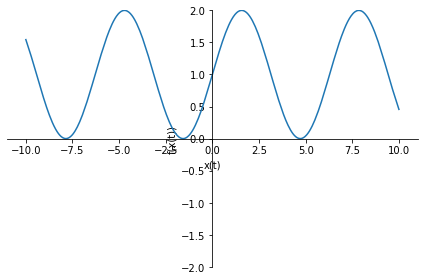

In [3]:
f = sin(x)+u
display(f)
p1 = plot(f.subs({u:1}).subs(forplot), ylim=(-2,2))

## Example

$$
\dot{x} = \sin(x) + u
$$
Steady state for $\o{x}=\frac{\pi}{3}$:
$$
\sin(\o{x})+u = 0 \rightarrow \o{u}=-\frac{\sqrt{3}}{2}
$$


In [4]:
xs, us = pi/3, symbols('\overline{u}')
display(Eq(f.subs({x:xs,u:us}),0))
us = solve(Eq(f.subs({x:xs,u:us}),0))[0]
display(us)
ss = {x:xs,u:us}
# display(f.subs(ss).evalf()) # test

Eq(\overline{u} + sqrt(3)/2, 0)

-sqrt(3)/2

$$
f(x,u) \simeq f(\o{x},\o{u}) + \left.\d{f}{x}\right|_{\o{x},\o{u}} x' + \left.\d{f}{u}\right|_{\o{x},\o{u}} u'
\rightarrow a = \left.\d{f}{x}\right|_{\o{x},\o{u}},\, b = \left.\d{f}{u}\right|_{\o{x},\o{u}}
$$

u' + x'/2

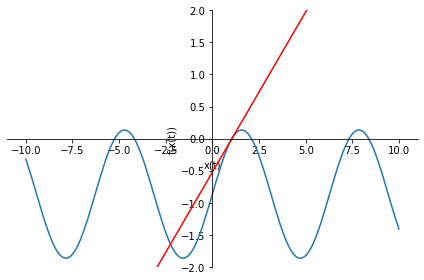

In [5]:
fs = f.subs(ss)
a = diff(f,x).subs(ss)
b = diff(f,u).subs(ss)
lf = fs + a * xd + b * ud
display(lf)
p1 = plot(f.subs({u:us}).subs(forplot), show=False, ylim=(-2,2))
p2 = plot(lf.subs({xd:xt-xs,ud:0}), show=False, line_color='red')
p1.extend(p2)
p1.show()

In [6]:
display(f, xs, us, lf)

u(t) + sin(x(t))

pi/3

-sqrt(3)/2

u' + x'/2

### State feedback
$$
\begin{align}
\dot{x} &= A x + B u\\
u &= -Kx
\end{align}
$$

$$
\begin{align}
\dot{x} &= (A-BK)x\\
x(t) &= e^{(A-BK)t}x(0)
\end{align}
$$

$$
\begin{align}
\dot{x} &\simeq ax'+bu'\\
u' &= -kx'\\
x' &= x-\o{x} \\
u &= u'+\o{u}
\end{align}
$$

$$
\begin{align}
a-bk &=-\alpha,\, \alpha > 0 \\
k &= \frac{\alpha+a}{b}
\end{align}
$$

In [7]:
alpha = 0.1;k = (alpha+a)/b;display(k.evalf())

0.600000000000000

In [8]:
def plant(t,x):
    u = controller(t,x)
    dx = f_num(x,u)
    return dx

@log_results
def controller(t,x):
    xd = x-xs
    ud = -k*xd
    u = ud+us
    return u

In [9]:
def plot_res(sim,fig):
    if fig == 0:
        ctrl = [controller.log[controller.t.index(time)] for time in sim.t]
        fig1 = plt.figure()
        ax1 = fig1.add_subplot(2,1,1)
        ax1.plot(sim.t,sim.y[0],label='x')
        ax2 = fig1.add_subplot(2,1,2)
        ax2.plot(sim.t,ctrl,label='u')
        ax1.legend(loc='best')
        ax2.legend(loc='best')
    
    if fig == 1:
        p1 = plot(f.subs({u:us}).subs(forplot), show=False, ylim=(-2,2))
        p2 = plot(lf.subs({xd:xt-xs,ud:0}), show=False, line_color='red')
        p1.extend(p2)
        p1.show()

In [10]:
f = sin(x)*x*cos(x)+u
xs, us = 2.5, symbols('\overline{u}')
us = solve(Eq(f.subs({x:xs,u:us}),0))[0]
ss = {x:xs,u:us}
a, b, f_num = diff(f,x).subs(ss), diff(f,u).subs(ss), lambdify((x,u),f)
lf, k = a * xd + b * ud, (alpha+a)/b 
# plot_res(sim,1)

u(t) + x(t)*sin(x(t))*cos(x(t))

2.5

1.19865534332892

u' + 0.229693326326497*x'

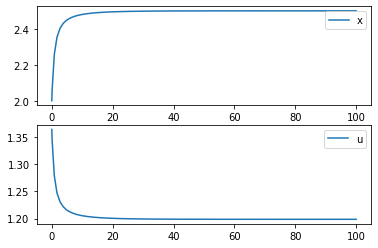

In [11]:
x0 = [2]
sim = solve_ivp(plant, [0,100], x0, max_step=1)
display(f,xs,us,lf)
plot_res(sim,0)

In [12]:
# Flying robot
phi_, tta_, psi_ = symbols('\phi \\theta \psi', cls=Function)
phi, tta, psi = phi_(t), tta_(t), psi_(t)

m, Ix, Iy, Iz = symbols('m I_x I_y I_z') # mass and inertia
u_,v_,w_,p_,q_,r_ = symbols('u v w p q r', cls=Function)
u,v,w,p,q,r = u_(t),v_(t),w_(t),p_(t),q_(t),r_(t)
xpag, ypag, zpag = symbols('{\\\,}^x{\\!}p^a_g {\\\,}^y{\\!}p^a_g {\\\,}^z{\\!}p^a_g')
S = lambda v: Matrix([[0, -v[2], v[1]],[v[2], 0, -v[0]],[-v[1], v[0], 0]])

## Forces
grav, rho, Vol = symbols('g \\rho_{air} V') # earch acceleration, air density, object volume
xpav, ypav, zpav = symbols('{\\\,}^x{\\!}p^a_v {\\\,}^y{\\!}p^a_v {\\\,}^z{\\!}p^a_v')
pav = Matrix([xpav,ypav,zpav])

# aerodynamical forces
uCd, vCd, wCd, pCd, qCd, rCd = symbols('{\\\,}^u{\\!}C_d {\\\,}^v{\\!}C_d {\\\,}^w{\\!}C_d {\\\,}^p{\\!}C_d {\\\,}^q{\\!}C_d {\\\,}^r{\\!}C_d')
uCl, vCl, pCl, qCl, rCl = symbols('{\\\,}^u{\\!}C_l {\\\,}^v{\\!}C_l {\\\,}^p{\\!}C_l {\\\,}^q{\\!}C_l {\\\,}^r{\\!}C_l')

tauu_,tauv_,tauw_,taup_,tauq_,taur_ = symbols('\\tau_u \\tau_v \\tau_w \\tau_p \\tau_q \\tau_r', cls=Function)
tauu,tauv,tauw,taup,tauq,taur = tauu_(t),tauv_(t),tauw_(t),taup_(t),tauq_(t),taur_(t)
tau = Matrix([tauu,tauv,tauw,taup,tauq,taur])

tauus,tauvs,tauws,taups,tauqs,taurs = symbols('\overline{\\tau}_u \overline{\\tau}_v \overline{\\tau}_w \overline{\\tau}_p \overline{\\tau}_q \overline{\\tau}_r')
taus = Matrix([tauus,tauvs,tauws,taups,tauqs,taurs])

us,vs,ws,ps,qs,rs = symbols('\overline{u} \overline{v} \overline{w} \overline{p} \overline{q} \overline{r}', constant=True)
gamaas = Matrix([us,vs,ws,ps,qs,rs])



## Flying robot model
$$
\begin{align}
\dpba &= \Rba \nuaa \\
\dot{\chi} &= J \omaa \\
\BM \dpba \\ \dot{\chi} \EBM &= \BM \Rba & 0 \\ 0 & J\EBM \gamaa = H \gamaa
\end{align}
$$

$$
M \dgamaa = \Gamma_r+\Gamma_a -C\gamaa + \tau
$$

In [13]:
def Rx(a):
    return Matrix([[1,0,0],
                  [0,cos(a),-sin(a)],
                  [0,sin(a),cos(a)]])

def Ry(a):
    return Matrix([[cos(a),0,sin(a)],
                  [0,1,0],
                  [-sin(a),0,cos(a)]])

def Rz(a):
    return Matrix([[cos(a),-sin(a),0],
                  [sin(a),cos(a),0],
                  [0,0,1]])

In [14]:
Chi = Matrix([[phi,tta,psi]]).T
dChi = diff(Chi,t)

def Jac(R,dChi=dChi):
    dR = (diff(R,t))
    Sw = (R.T @ dR)
    omsw = Matrix([[Sw[(2,1)]],[Sw[(0,2)]],[Sw[(1,0)]]])
    iJ = simplify(omsw.jacobian(dChi))
    J = simplify(iJ.inverse())
    return J

Rba = ImmutableDenseMatrix(Rz(psi) @ Ry(tta) @ Rx(phi)) # RPY
Rab = Rba.T
Jba = Jac(Rba)
Eta = Rba.col_join(zeros(3)).row_join(zeros(3).col_join(Jba))
iEta = simplify(Eta.inverse())

$$
\BM \dpba \\ \dot{\chi} \EBM = \BM \Rba & 0 \\ 0 & J\EBM \gamaa = H \gamaa
$$

In [15]:
display(Eta)

Matrix([
[cos(\psi(t))*cos(\theta(t)), sin(\phi(t))*sin(\theta(t))*cos(\psi(t)) - sin(\psi(t))*cos(\phi(t)),  sin(\phi(t))*sin(\psi(t)) + sin(\theta(t))*cos(\phi(t))*cos(\psi(t)), 0,                           0,                           0],
[sin(\psi(t))*cos(\theta(t)), sin(\phi(t))*sin(\psi(t))*sin(\theta(t)) + cos(\phi(t))*cos(\psi(t)), -sin(\phi(t))*cos(\psi(t)) + sin(\psi(t))*sin(\theta(t))*cos(\phi(t)), 0,                           0,                           0],
[            -sin(\theta(t)),                                          sin(\phi(t))*cos(\theta(t)),                                           cos(\phi(t))*cos(\theta(t)), 0,                           0,                           0],
[                          0,                                                                    0,                                                                     0, 1, sin(\phi(t))*tan(\theta(t)), cos(\phi(t))*tan(\theta(t))],
[                          0,                              

 $$
 \begin{align}
   M &\triangleq \BM M_F \\ M_N \EBM = \BM m \cdot 1_{3\times 3} & -m \Spag \\  m \Spag & I \EBM\\
 C(\omaa) &\triangleq \BM C_F \\ C_N \EBM = \BM m \Somaa & - m \Somaa \Spag \\ m \Spag \Somaa & - \Somaa I \EBM\\
 \end{align}
 $$

In [16]:
I, nu, omaa, pag = diag(Ix,Iy,Iz), Matrix([u,v,w]), Matrix([p,q,r]), Matrix([xpag,ypag,zpag])
M = (m*eye(3)).row_join(-m * S(pag)).col_join((m * S(pag)).row_join(I))
C = (m*S(omaa)).row_join(-m*S(omaa)*S(pag)).col_join((m*S(pag)*S(omaa)).row_join(-S(omaa)*I))
display(M,C)

Matrix([
[                 m,                  0,                  0,                  0,  m*{\,}^z{\!}p^a_g, -m*{\,}^y{\!}p^a_g],
[                 0,                  m,                  0, -m*{\,}^z{\!}p^a_g,                  0,  m*{\,}^x{\!}p^a_g],
[                 0,                  0,                  m,  m*{\,}^y{\!}p^a_g, -m*{\,}^x{\!}p^a_g,                  0],
[                 0, -m*{\,}^z{\!}p^a_g,  m*{\,}^y{\!}p^a_g,                I_x,                  0,                  0],
[ m*{\,}^z{\!}p^a_g,                  0, -m*{\,}^x{\!}p^a_g,                  0,                I_y,                  0],
[-m*{\,}^y{\!}p^a_g,  m*{\,}^x{\!}p^a_g,                  0,                  0,                  0,                I_z]])

Matrix([
[                                               0,                                          -m*r(t),                                           m*q(t), m*{\,}^y{\!}p^a_g*q(t) + m*{\,}^z{\!}p^a_g*r(t),                         -m*{\,}^x{\!}p^a_g*q(t),                         -m*{\,}^x{\!}p^a_g*r(t)],
[                                          m*r(t),                                                0,                                          -m*p(t),                         -m*{\,}^y{\!}p^a_g*p(t), m*{\,}^x{\!}p^a_g*p(t) + m*{\,}^z{\!}p^a_g*r(t),                         -m*{\,}^y{\!}p^a_g*r(t)],
[                                         -m*q(t),                                           m*p(t),                                                0,                         -m*{\,}^z{\!}p^a_g*p(t),                         -m*{\,}^z{\!}p^a_g*q(t), m*{\,}^x{\!}p^a_g*p(t) + m*{\,}^y{\!}p^a_g*q(t)],
[-m*{\,}^y{\!}p^a_g*q(t) - m*{\,}^z{\!}p^a_g*r(t),                           m*{\,}^y{\!}p^a_g

<table >
 <tr style="background-color:rgba(0,0,0,0);font-size:26px">
 <th>
$$
    \begin{align}
    \Fg^b =& \BM 0 \\ 0 \\ -m \cdot g \EBM \\
    \Fg^a =& \Rab \Fg^b
    \end{align}
    $$

 $$
 \begin{align}
    \Ng^a =& S(\pag)\Fg^a \\
    \Ng^a =& S(\pag)\Rab \Fg^b \\
 \end{align}
 $$
 </th>
 <th>
    $$
    \begin{align}
    \Fv^b =& \BM 0 \\ 0 \\ \rho_{air} \cdot g \cdot V \EBM \\
    \Fv^a =& \Rab \Fv^b
    \end{align}
    $$
    $$
 \begin{align}
    \Nv^a =& S(\pav)\Fv^a \\
    \Nv^a =& S(\pav)\Rab \Fv^b \\
 \end{align}
 $$
 
 </th>
 </tr>
 </table>
 $$
 \begin{align}
    \Gamma_r =& \BM \Fg^a + \Fv^a \\ \Ng^a + \Nv^a \EBM
 \end{align}
$$

In [17]:
# gravity
Fbg = Matrix([0,0,-m*grav])
Fag = Rab*Fbg
Nag = S(pag)*Fag
Gag = Fag.col_join(Nag)

# bouyancy
Fbv = Matrix([0,0,rho*grav*Vol])
Fav = Rab*Fbv
Nav = S(pav)*Fav
Gav = Fav.col_join(Nav)

# restoring forces
Gar = Gag+Gav
display(Gar)

Matrix([
[                                                                                                                                                                        -V*\rho_{air}*g*sin(\theta(t)) + g*m*sin(\theta(t))],
[                                                                                                                                               V*\rho_{air}*g*sin(\phi(t))*cos(\theta(t)) - g*m*sin(\phi(t))*cos(\theta(t))],
[                                                                                                                                               V*\rho_{air}*g*cos(\phi(t))*cos(\theta(t)) - g*m*cos(\phi(t))*cos(\theta(t))],
[V*\rho_{air}*g*{\,}^y{\!}p^a_v*cos(\phi(t))*cos(\theta(t)) - V*\rho_{air}*g*{\,}^z{\!}p^a_v*sin(\phi(t))*cos(\theta(t)) - g*m*{\,}^y{\!}p^a_g*cos(\phi(t))*cos(\theta(t)) + g*m*{\,}^z{\!}p^a_g*sin(\phi(t))*cos(\theta(t))],
[                         -V*\rho_{air}*g*{\,}^x{\!}p^a_v*cos(\phi(t))*cos(\theta(t)) - V*\rho_{air

<div style="font-size:16px">
$$
    C_{l} = \BM 0 & 0 & 0 & 0 & 0 & 0 \\
                    0 & 0 & 0 & 0 & 0 & 0 \\
                     {}^uC_l & {}^vC_l & 0 & {}^pC_l & {}^qC_l & {}^rC_l \\
                    0 & 0 & 0 & 0 & 0 & 0 \\
                    0 & 0 & 0 & 0 & 0 & 0 \\
                    0 & 0 & 0 & 0 & 0 & 0\EBM,\\ \,
    C_{d} = \BM {}^uC_d & 0 & 0 & 0 & 0 & 0 \\
                    0 & {}^vC_d & 0 & 0 & 0 & 0 \\
                     0 & 0 & {}^wC_d & 0 & 0 & 0 \\
                    0 & 0 & 0 & {}^pC_d & 0 & 0 \\
                    0 & 0 & 0 & 0 & {}^qC_d & 0 \\
                    0 & 0 & 0 & 0 & 0 & {}^rC_d\EBM,
                    {}^{x}C_d \geq 0,             
$$
</div>
$$
\Gamma_{a} = -C_d \cdot \text{sign}\left(\gamaa\right) \circ \gamaa \circ \gamaa + C_l \cdot \gamaa \circ \gamaa
$$

In [18]:
gamaa, sgamaa = nu.col_join(omaa), Matrix([sign(u),sign(v),sign(w),sign(p),sign(q),sign(r)])
Cad = Matrix([[uCd,0,0,0,0,0],[0,vCd,0,0,0,0],[0,0,wCd,0,0,0],[0,0,0,pCd,0,0],[0,0,0,0,qCd,0],[0,0,0,0,0,rCd]])
Cal = Matrix([[0,0,0,0,0,0],[0,0,0,0,0,0],[uCl,vCl,0,pCl,qCl,rCl],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]])
Gaa = -Cad * mme(sgamaa,mme(gamaa,gamaa)) + Cal * mme(gamaa,gamaa)
display(Gaa) 

Matrix([
[                                                                                                                       -{\,}^u{\!}C_d*u(t)**2*sign(u(t))],
[                                                                                                                       -{\,}^v{\!}C_d*v(t)**2*sign(v(t))],
[{\,}^p{\!}C_l*p(t)**2 + {\,}^q{\!}C_l*q(t)**2 + {\,}^r{\!}C_l*r(t)**2 + {\,}^u{\!}C_l*u(t)**2 + {\,}^v{\!}C_l*v(t)**2 - {\,}^w{\!}C_d*w(t)**2*sign(w(t))],
[                                                                                                                       -{\,}^p{\!}C_d*p(t)**2*sign(p(t))],
[                                                                                                                       -{\,}^q{\!}C_d*q(t)**2*sign(q(t))],
[                                                                                                                       -{\,}^r{\!}C_d*r(t)**2*sign(r(t))]])

$$
f(t) = \Gamma_r+\Gamma_a-C\gamaa +\tau = M \dgamaa
$$

In [19]:
F = simplify(Gar + Gaa - C*gamaa + tau)

In [20]:
display(F)

Matrix([
[                                                                                                                                                                                                                                                                                                      Piecewise((-V*\rho_{air}*g*sin(\theta(t)) + g*m*sin(\theta(t)) + m*{\,}^x{\!}p^a_g*q(t)**2 + m*{\,}^x{\!}p^a_g*r(t)**2 - m*({\,}^y{\!}p^a_g*q(t) + {\,}^z{\!}p^a_g*r(t))*p(t) - m*q(t)*w(t) + m*r(t)*v(t) + \tau_u(t), Eq(u(t), 0)), ((-{\,}^u{\!}C_d*u(t)**3 + (-V*\rho_{air}*g*sin(\theta(t)) + g*m*sin(\theta(t)) + m*{\,}^x{\!}p^a_g*q(t)**2 + m*{\,}^x{\!}p^a_g*r(t)**2 - m*({\,}^y{\!}p^a_g*q(t) + {\,}^z{\!}p^a_g*r(t))*p(t) - m*q(t)*w(t) + m*r(t)*v(t) + \tau_u(t))*Abs(u(t)))/Abs(u(t)), True))],
[                                                                                                                                                                                                           

### Steady state
$$\o{\gamaa} = \BM \o{u} & \o{v} & \o{w} & \o{p} & \o{q} & \o{r} \EBM\T$$

$$f(t) = 0 \rightarrow \o{\tau} = -\left(\Gamma_r+\Gamma_a-C \o{\gamaa}\right)$$

In [21]:
taus = simplify(-(Gar+Gaa-C*gamaas))

In [22]:
display(taus)

Matrix([
[                                                                                                                                                                                                                                                                                                      Piecewise((V*\rho_{air}*g*sin(\theta(t)) + \overline{p}*m*({\,}^y{\!}p^a_g*q(t) + {\,}^z{\!}p^a_g*r(t)) - \overline{q}*m*{\,}^x{\!}p^a_g*q(t) - \overline{r}*m*{\,}^x{\!}p^a_g*r(t) - \overline{v}*m*r(t) + \overline{w}*m*q(t) - g*m*sin(\theta(t)), Eq(u(t), 0)), (V*\rho_{air}*g*sin(\theta(t)) + \overline{p}*m*{\,}^y{\!}p^a_g*q(t) + \overline{p}*m*{\,}^z{\!}p^a_g*r(t) - \overline{q}*m*{\,}^x{\!}p^a_g*q(t) - \overline{r}*m*{\,}^x{\!}p^a_g*r(t) - \overline{v}*m*r(t) + \overline{w}*m*q(t) - g*m*sin(\theta(t)) + {\,}^u{\!}C_d*u(t)**3/Abs(u(t)), True))],
[                                                                                                                                               

## Taylor expansion

In [23]:
ss = dict(zip(gamaa,gamaas));ss.update(dict(zip(tau,taus)));ss_diff={diff(sign(us),us):0,diff(sign(vs),vs):0,diff(sign(ws),ws):0,diff(sign(ps),ps):0,diff(sign(qs),qs):0,diff(sign(rs),rs):0}
A = F.jacobian(gamaa).subs(ss).subs(ss_diff)
B = F.jacobian(tau).subs(ss)

In [24]:
display(A,B,gamaas,taus)

Matrix([
[Piecewise((0, Eq(\overline{u}, 0)), ((-3*\overline{u}**2*{\,}^u{\!}C_d + (re(\overline{u})*Derivative(re(\overline{u}), \overline{u}) + im(\overline{u})*Derivative(im(\overline{u}), \overline{u}))*(-V*\rho_{air}*g*sin(\theta(t)) - \overline{p}*m*(\overline{q}*{\,}^y{\!}p^a_g + \overline{r}*{\,}^z{\!}p^a_g) + \overline{q}**2*m*{\,}^x{\!}p^a_g - \overline{q}*\overline{w}*m + \overline{r}**2*m*{\,}^x{\!}p^a_g + \overline{r}*\overline{v}*m + g*m*sin(\theta(t)) + Piecewise((V*\rho_{air}*g*sin(\theta(t)) + \overline{p}*m*(\overline{q}*{\,}^y{\!}p^a_g + \overline{r}*{\,}^z{\!}p^a_g) - \overline{q}**2*m*{\,}^x{\!}p^a_g + \overline{q}*\overline{w}*m - \overline{r}**2*m*{\,}^x{\!}p^a_g - \overline{r}*\overline{v}*m - g*m*sin(\theta(t)), Eq(\overline{u}, 0)), (V*\rho_{air}*g*sin(\theta(t)) + \overline{p}*\overline{q}*m*{\,}^y{\!}p^a_g + \overline{p}*\overline{r}*m*{\,}^z{\!}p^a_g - \overline{q}**2*m*{\,}^x{\!}p^a_g + \overline{q}*\overline{w}*m - \overline{r}**2*m*{\,}^x{\!}p^a_g - \ove

Matrix([
[1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 1]])

Matrix([
[\overline{u}],
[\overline{v}],
[\overline{w}],
[\overline{p}],
[\overline{q}],
[\overline{r}]])

Matrix([
[                                                                                                                                                                                                                                                                                                      Piecewise((V*\rho_{air}*g*sin(\theta(t)) + \overline{p}*m*({\,}^y{\!}p^a_g*q(t) + {\,}^z{\!}p^a_g*r(t)) - \overline{q}*m*{\,}^x{\!}p^a_g*q(t) - \overline{r}*m*{\,}^x{\!}p^a_g*r(t) - \overline{v}*m*r(t) + \overline{w}*m*q(t) - g*m*sin(\theta(t)), Eq(u(t), 0)), (V*\rho_{air}*g*sin(\theta(t)) + \overline{p}*m*{\,}^y{\!}p^a_g*q(t) + \overline{p}*m*{\,}^z{\!}p^a_g*r(t) - \overline{q}*m*{\,}^x{\!}p^a_g*q(t) - \overline{r}*m*{\,}^x{\!}p^a_g*r(t) - \overline{v}*m*r(t) + \overline{w}*m*q(t) - g*m*sin(\theta(t)) + {\,}^u{\!}C_d*u(t)**3/Abs(u(t)), True))],
[                                                                                                                                               

In [25]:
params = {grav:9.81,xpav:0,ypav:0,zpav:0,xpag:0,ypag:0,zpag:0,Vol:0,uCl:1,vCl:0,pCl:0,qCl:0,rCl:0}
params.update({uCd:0.01,vCd:1,wCd:10,pCd:1,qCd:1,rCd:1})
params.update({m:10,Ix:1,Iy:1,Iz:2}) 
display(A.subs(params))
display(taus.subs(params))

Matrix([
[Piecewise((0, Eq(\overline{u}, 0)), ((-0.03*\overline{u}**2 + (re(\overline{u})*Derivative(re(\overline{u}), \overline{u}) + im(\overline{u})*Derivative(im(\overline{u}), \overline{u}))*(-10*\overline{q}*\overline{w} + 10*\overline{r}*\overline{v} + Piecewise((10*\overline{q}*\overline{w} - 10*\overline{r}*\overline{v} - 98.1*sin(\theta(t)), Eq(\overline{u}, 0)), (10*\overline{q}*\overline{w} - 10*\overline{r}*\overline{v} + 0.01*\overline{u}**3/Abs(\overline{u}) - 98.1*sin(\theta(t)), True)) + 98.1*sin(\theta(t)))*sign(\overline{u})/\overline{u})/Abs(\overline{u}) - (-0.01*\overline{u}**3 + (-10*\overline{q}*\overline{w} + 10*\overline{r}*\overline{v} + Piecewise((10*\overline{q}*\overline{w} - 10*\overline{r}*\overline{v} - 98.1*sin(\theta(t)), Eq(\overline{u}, 0)), (10*\overline{q}*\overline{w} - 10*\overline{r}*\overline{v} + 0.01*\overline{u}**3/Abs(\overline{u}) - 98.1*sin(\theta(t)), True)) + 98.1*sin(\theta(t)))*Abs(\overline{u}))*(re(\overline{u})*Derivative(re(\over

Matrix([
[                                            Piecewise((-10*\overline{v}*r(t) + 10*\overline{w}*q(t) - 98.1*sin(\theta(t)), Eq(u(t), 0)), (-10*\overline{v}*r(t) + 10*\overline{w}*q(t) + 0.01*u(t)**3/Abs(u(t)) - 98.1*sin(\theta(t)), True))],
[                         Piecewise((10*\overline{u}*r(t) - 10*\overline{w}*p(t) + 98.1*sin(\phi(t))*cos(\theta(t)), Eq(v(t), 0)), (10*\overline{u}*r(t) - 10*\overline{w}*p(t) + v(t)**3/Abs(v(t)) + 98.1*sin(\phi(t))*cos(\theta(t)), True))],
[Piecewise((-10*\overline{u}*q(t) + 10*\overline{v}*p(t) - u(t)**2 + 98.1*cos(\phi(t))*cos(\theta(t)), Eq(w(t), 0)), (-10*\overline{u}*q(t) + 10*\overline{v}*p(t) - u(t)**2 + 10*w(t)**3/Abs(w(t)) + 98.1*cos(\phi(t))*cos(\theta(t)), True))],
[                                                                                                       Piecewise((\overline{q}*r(t) - 2*\overline{r}*q(t), Eq(p(t), 0)), (\overline{q}*r(t) - 2*\overline{r}*q(t) + p(t)**3/Abs(p(t)), True))],
[                          

In [26]:
kin = {phi:0.3,tta:1}
gamaa_s = [1,0,0,0,0,0]
ss_cond = dict(zip(gamaas,gamaa_s))
A1 = A.subs(params).subs(ss_cond)
display(A1)
display(taus.subs(params).subs(ss_cond).subs(kin).evalf()) 

Matrix([
[0.01*Subs(Derivative(re(\overline{u}), \overline{u}), \overline{u}, 1) - 0.03, 0, 0, 0,  0,   0],
[                                                                            0, 0, 0, 0,  0, -10],
[                                                                            2, 0, 0, 0, 10,   0],
[                                                                            0, 0, 0, 0,  0,   0],
[                                                                            0, 0, 0, 0,  0,   0],
[                                                                            0, 0, 0, 0,  0,   0]])

Matrix([
[                                             Piecewise((-82.5483036096547, Eq(u(t), 0)), (0.01*u(t)**3/Abs(u(t)) - 82.5483036096547, True))],
[                           Piecewise((10.0*r(t) + 15.6636514357046, Eq(v(t), 0)), (10.0*r(t) + v(t)**3/Abs(v(t)) + 15.6636514357046, True))],
[Piecewise((-10.0*q(t) - u(t)**2 + 50.6363268303402, Eq(w(t), 0)), (-10.0*q(t) - u(t)**2 + 10.0*w(t)**3/Abs(w(t)) + 50.6363268303402, True))],
[                                                                                     Piecewise((0, Eq(p(t), 0)), (p(t)**3/Abs(p(t)), True))],
[                                                                                     Piecewise((0, Eq(q(t), 0)), (q(t)**3/Abs(q(t)), True))],
[                                                                                     Piecewise((0, Eq(r(t), 0)), (r(t)**3/Abs(r(t)), True))]])

In [27]:
k1,k2,k3,k4,k5,k6 = symbols('k_1 k_2 k_3 k_4 k_5 k_6', real=True)
K = diag(k1,k2,k3,k4,k5,k6)
iM = M.subs(params).inv()
k_cond = (iM * A1 - iM * B*K).eigenvals() 
for k in k_cond:
    display(k)

0.1*(-1.0*k_1 + 0.01*Subs(Derivative(re(\overline{u}), \overline{u}), \overline{u}, 1) - 0.03)

-k_6/2

-k_2/10

-k_5

-k_3/10

-k_4

In [28]:
K = diag(10,10,10,1,1,5)

display(F.subs(params).subs(kin))
F_num = lambdify((u,v,w,p,q,r,tauu,tauv,tauw,taup,tauq,taur),F.subs(params).subs(kin))
display(taus.subs(params).subs(ss_cond).subs(kin).subs({us:1}))
taus_num = lambdify((u,v,w,p,q,r,us,vs,ws,ps,qs,rs),taus.subs(params).subs(kin))    

Matrix([
[                                        Piecewise((\tau_u(t) - 10*q(t)*w(t) + 10*r(t)*v(t) + 98.1*sin(1), Eq(u(t), 0)), (((\tau_u(t) - 10*q(t)*w(t) + 10*r(t)*v(t) + 98.1*sin(1))*Abs(u(t)) - 0.01*u(t)**3)/Abs(u(t)), True))],
[                     Piecewise((\tau_v(t) + 10*p(t)*w(t) - 10*r(t)*u(t) - 28.9905322734774*cos(1), Eq(v(t), 0)), (((\tau_v(t) + 10*p(t)*w(t) - 10*r(t)*u(t) - 28.9905322734774*cos(1))*Abs(v(t)) - v(t)**3)/Abs(v(t)), True))],
[Piecewise((\tau_w(t) - 10*p(t)*v(t) + 10*q(t)*u(t) + u(t)**2 - 93.718509583222*cos(1), Eq(w(t), 0)), (((\tau_w(t) - 10*p(t)*v(t) + 10*q(t)*u(t) + u(t)**2 - 93.718509583222*cos(1))*Abs(w(t)) - 10*w(t)**3)/Abs(w(t)), True))],
[                                                                                                             Piecewise((\tau_p(t) + q(t)*r(t), Eq(p(t), 0)), (((\tau_p(t) + q(t)*r(t))*Abs(p(t)) - p(t)**3)/Abs(p(t)), True))],
[                                                                                          

Matrix([
[                                                             Piecewise((-98.1*sin(1), Eq(u(t), 0)), (0.01*u(t)**3/Abs(u(t)) - 98.1*sin(1), True))],
[                       Piecewise((10*r(t) + 28.9905322734774*cos(1), Eq(v(t), 0)), (10*r(t) + v(t)**3/Abs(v(t)) + 28.9905322734774*cos(1), True))],
[Piecewise((-10*q(t) - u(t)**2 + 93.718509583222*cos(1), Eq(w(t), 0)), (-10*q(t) - u(t)**2 + 10*w(t)**3/Abs(w(t)) + 93.718509583222*cos(1), True))],
[                                                                                           Piecewise((0, Eq(p(t), 0)), (p(t)**3/Abs(p(t)), True))],
[                                                                                           Piecewise((0, Eq(q(t), 0)), (q(t)**3/Abs(q(t)), True))],
[                                                                                           Piecewise((0, Eq(r(t), 0)), (r(t)**3/Abs(r(t)), True))]])

In [29]:
def flying_robot(t,gamaa):
    tau = ctrl(t,gamaa)
    u,v,w,p,q,r = gamaa
    tauu,tauv,tauw,taup,tauq,taur = tau
    dgamaa = np.ndarray.tolist(F_num(u,v,w,p,q,r,tauu,tauv,tauw,taup,tauq,taur).T)[0]
    return dgamaa

@log_results
def ctrl(t,gamaa):
    u,v,w,p,q,r = gamaa
    us,vs,ws,ps,qs,rs = gamaa_s
    gamaa_dev = gamaa - gamaa_s
    tau_dev = -K @ gamaa_dev
    tau = tau_dev+np.ndarray.tolist(taus_num(u,v,w,p,q,r,us,vs,ws,ps,qs,rs).T)[0]
    return tau

In [30]:
gamaa0 = [0,2,2,1,-1,1]
sim = solve_ivp(flying_robot,[0,5],gamaa0);control = np.array([ctrl.log[ctrl.t.index(time)] for time in sim.t]).T

<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in double_scalars
  return array([[select([equal(_Dummy_2332, 0),True], [-10*_Dummy_2333*Dummy_2337 + 10*_Dummy_2334*Dummy_2336 - 98.1*sin(1),0.01*_Dummy_2332**3/abs(_Dummy_2332) - 10*_Dummy_2333*Dummy_2337 + 10*_Dummy_2334*Dummy_2336 - 98.1*sin(1)], default=nan)], [select([equal(_Dummy_2331, 0),True], [10*_Dummy_2333*Dummy_2338 - 10*_Dummy_2335*Dummy_2336 + 28.9905322734774*cos(1),_Dummy_2331**3/abs(_Dummy_2331) + 10*_Dummy_2333*Dummy_2338 - 10*_Dummy_2335*Dummy_2336 + 28.9905322734774*cos(1)], default=nan)], [select([equal(_Dummy_2330, 0),True], [-_Dummy_2332**2 - 10*_Dummy_2334*Dummy_2338 + 10*_Dummy_2335*Dummy_2337 + 93.718509583222*cos(1),10*_Dummy_2330**3/abs(_Dummy_2330) - _Dummy_2332**2 - 10*_Dummy_2334*Dummy_2338 + 10*_Dummy_2335*Dummy_2337 + 93.718509583222*cos(1)], default=nan)], [select([equal(_Dummy_2335, 0),True], [_Dummy_2333*Dummy_2340 - 2*_Dummy_2334*Dummy_2339,_Dummy_2333*Dummy_2340 - 2*_Dummy_2334*Dum

1.9238675041943765e-07

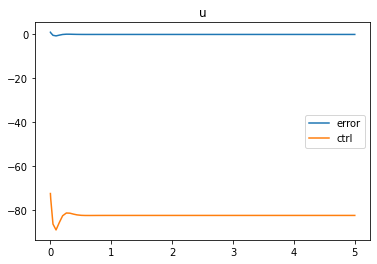

In [31]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
# ax1.plot(sim.t,sim.y.T)
i = 0
titles = ['u','v','w','p','q','r']
ax1.plot(sim.t,gamaa_s[i]-sim.y[i],label='error')
ax1.plot(sim.t,control[i],label='ctrl')
ax1.legend(loc='best')
ax1.set(title=titles[i])
gamaa_s[i]-sim.y[i][-1]

In [32]:

cM = B

for i in range(A.shape[1]-1):
    cM = cM.row_join(A1**(i+1)*B)
display(cM)
cM.rank()

Matrix([
[1, 0, 0, 0, 0, 0, 0.01*Subs(Derivative(re(\overline{u}), \overline{u}), \overline{u}, 1) - 0.03, 0, 0, 0,  0,   0, 0.0001*Subs(Derivative(re(\overline{u}), \overline{u}), \overline{u}, 1)**2 - 0.0006*Subs(Derivative(re(\overline{u}), \overline{u}), \overline{u}, 1) + 0.0009, 0, 0, 0, 0, 0, 1.0e-6*Subs(Derivative(re(\overline{u}), \overline{u}), \overline{u}, 1)**3 - 9.0e-6*Subs(Derivative(re(\overline{u}), \overline{u}), \overline{u}, 1)**2 + 2.7e-5*Subs(Derivative(re(\overline{u}), \overline{u}), \overline{u}, 1) - 2.7e-5, 0, 0, 0, 0, 0, 1.0e-8*Subs(Derivative(re(\overline{u}), \overline{u}), \overline{u}, 1)**4 - 1.2e-7*Subs(Derivative(re(\overline{u}), \overline{u}), \overline{u}, 1)**3 + 5.4e-7*Subs(Derivative(re(\overline{u}), \overline{u}), \overline{u}, 1)**2 - 1.08e-6*Subs(Derivative(re(\overline{u}), \overline{u}), \overline{u}, 1) + 8.1e-7, 0, 0, 0, 0, 0, 1.0e-10*Subs(Derivative(re(\overline{u}), \overline{u}), \overline{u}, 1)**5 - 1.5e-9*Subs(Derivative(re(\overli

6